<a href="https://colab.research.google.com/github/dha5sm/project_voting/blob/main/Data_exploration_project_voting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/dha5sm/project_voting/

Cloning into 'project_voting'...
remote: Enumerating objects: 130, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 130 (delta 33), reused 28 (delta 20), pack-reused 82
Receiving objects: 100% (130/130), 31.56 MiB | 16.70 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [2]:
import pandas as pd
import numpy as np
import os
from functools import reduce


**Relevant Data Frames Created**



*   df_VA2020 - Demographic data county by county during the most recent reporting period in 2020
*   df_Votes - How each county in Virginia voted in the past elections year by year



Going through all county data files

In [3]:
#Getting the name of all csv files to use
direct = './project_voting/data/county_data'

files = []

for file in os.listdir(direct):
  if file.endswith("E.csv"):
    files.append(file)

print(files)
print(len(files))

['0002_ds250_20205_county_E.csv', '0002_ds176_20105_county_E.csv', '0002_ds239_20185_county_E.csv', '0002_ds249_20205_county_E.csv', '0002_ds191_20125_county_E.csv', '0002_ds225_20165_county_E.csv', '0002_ds206_20145_county_E.csv', '0002_ds177_20105_county_E.csv']
8


In [4]:
dataframes = []

for file in files:

  #print("File is: " , file)

  if file == "0002_ds250_20205_county_E.csv" or file == "0002_ds249_20205_county_E.csv":
    df_cur = pd.read_csv(direct + "/" + file, encoding='ISO-8859-1')

    df_for_va =  df_cur[df_cur['STATE'] == 'Virginia']

    dataframes.append(df_for_va)

#df = pd.concat(dataframes, ignore_index = True)

#print(df.shape)

<ipython-input-4-f05eab59c475>:8: DtypeWarning: Columns (3,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,2

In [5]:
#Only using most recent data of VA demographics to keep managable from 2016 to 2020


columns_keep = dataframes[0].columns
columns_keep = columns_keep.drop('GISJOIN')


df2 = dataframes[1]

for col in columns_keep:
    if col in df2:
        df2 = df2.drop(columns=col)

df_VA2020 = pd.merge(dataframes[0], df2, on='GISJOIN')


df_VA2020 contains all the demographic information for Virginia on a county by county basis for the years 2016 - 2020

There are some columns with NAN values but will filter based on which columns are used / looked at

Getting Voting data

In [6]:
df_Votes = pd.read_csv("./project_voting/data/voting_VA.csv")
df_Votes.shape

(3736, 13)

In [7]:
na_count = df_Votes.isna().sum()
print(na_count)

Unnamed: 0        0
year              0
state             0
state_po          0
county_name       0
county_fips       0
office            0
candidate         0
party             0
candidatevotes    0
totalvotes        0
version           0
mode              0
dtype: int64


In [8]:
df_VA2020.head()

,GISJOIN,YEAR,STUSAB,REGIONA,DIVISIONA,STATE,STATEA,COUNTY,COUNTYA,COUSUBA,...,AMWSE004,AMWSE005,AMWSE006,AMWSE007,AMWSE008,AMWSE009,AMWSE010,AMWSE011,AMWSE012,AMWSE013
0,G5100010,2016-2020,VA,NaN,NaN,Virginia,51,Accomack County,001,NaN,...,9929,8310,2429,6248,1300,1444,102,10,414,3225
1,G5100030,2016-2020,VA,NaN,NaN,Virginia,51,Albemarle County,003,NaN,...,37296,33759,8754,26716,2896,2301,297,86,956,3970
2,G5100050,2016-2020,VA,NaN,NaN,Virginia,51,Alleghany County,005,NaN,...,4682,3547,387,4145,1003,334,37,0,181,1619
3,G5100070,2016-2020,VA,NaN,NaN,Virginia,51,Amelia County,007,NaN,...,3863,3171,648,2401,527,1048,123,12,63,1095
4,G5100090,2016-2020,VA,NaN,NaN,Virginia,51,Amherst County,009,NaN,...,9139,7786,2374,5479,945,1281,262,26,282,2639


In [9]:
df_Votes.head(10)

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,11161,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,AL GORE,DEMOCRAT,5092,11925,20220315,TOTAL
1,11162,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,6352,11925,20220315,TOTAL
2,11163,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,RALPH NADER,GREEN,220,11925,20220315,TOTAL
3,11164,2000,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,261,11925,20220315,TOTAL
4,11165,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,AL GORE,DEMOCRAT,16255,36846,20220315,TOTAL
5,11166,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,18291,36846,20220315,TOTAL
6,11167,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,RALPH NADER,GREEN,2043,36846,20220315,TOTAL
7,11168,2000,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,OTHER,OTHER,257,36846,20220315,TOTAL
8,11169,2000,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,AL GORE,DEMOCRAT,2214,5123,20220315,TOTAL
9,11170,2000,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,2808,5123,20220315,TOTAL


In [10]:
df_Votes_2020 = df_Votes[df_Votes['year'] == 2020]

df_Votes_party = df_Votes_2020.pivot_table(index="county_name", columns="party", values="candidatevotes", fill_value=0).reset_index()
df_Votes_party.head(20)

df_Votes_party.shape

(133, 5)

In [11]:
cols = ['DEMOCRAT','LIBERTARIAN', 'OTHER', 'REPUBLICAN' ]

def convert_str(val):
  float_n = float(val)
  int_n = int(float_n)
  return int_n

for col in cols:
  df_Votes_party[col] = df_Votes_party[col].apply(convert_str)

#https://saturncloud.io/blog/how-to-sum-values-of-a-row-of-a-pandas-dataframe-efficiently/#:~:text=The%20most%20efficient%20way%20to,the%20values%20in%20each%20row.
df_Votes_party['total_votes'] = df_Votes_party[ cols ].sum(axis = 1)



In [12]:
df_Votes_party.head()

party,county_name,DEMOCRAT,LIBERTARIAN,OTHER,REPUBLICAN,total_votes
0,ACCOMACK,2526,62,8,3057,5653
1,ALBEMARLE,14155,338,124,6934,21551
2,ALEXANDRIA CITY,22080,340,238,4848,27506
3,ALLEGHANY,747,29,4,1953,2733
4,AMELIA,803,26,4,1796,2629


In [13]:
cols_to_eval = []
df_test = df_VA2020[:20]
#for col in df_test.columns:
  #print(col)

In [14]:
columns_keep = ['GISJOIN', 'YEAR', 'STATE', 'COUNTY', 'COUNTYA', 'AMPWE001', 'AMPWE002', 'AMPWE003', 'AMPWE004', 'AMPWE005', 'AMPWE006', 'AMPWE007', 'AMR8E001', 'AMRZE022', 'AMRZE001', 'AMZLE001', 'AMZLE002', 'AMZLE003']

df_select_data = df_VA2020[columns_keep]

In [15]:
col_names = {
    'AMPWE001':'Total_Reporting_Race',
    'AMPWE002':'White',
    'AMPWE003':'African_American',
    'AMPWE004': 'Indian_or_Alaska',
    'AMPWE005': 'Asian',
    'AMPWE006' : 'Pacific_Islander',
    'AMPWE007' : 'Other',
    'AMR8E001': 'Median_House_Income',
    'AMRZE022': 'People_with_Bachelors',
    'AMRZE001': 'Total_pop_asked_education',
    'AMZLE001' : 'Total_reporting_lang_at_home',
    'AMZLE002': 'English_in_home',
    'AMZLE003': 'Spanish_in_home'
}

df_select_data.rename(columns= col_names , inplace=True)

df_select_data['Other_lang_at_home'] = df_select_data['Total_reporting_lang_at_home'] - df_select_data['English_in_home'] - df_select_data['Spanish_in_home']


<ipython-input-15-82fed6aae0ee>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select_data.rename(columns= col_names , inplace=True)
<ipython-input-15-82fed6aae0ee>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select_data['Other_lang_at_home'] = df_select_data['Total_reporting_lang_at_home'] - df_select_data['English_in_home'] - df_select_data['Spanish_in_home']


In [16]:
#df_select_data.head(20)
#for col in df_select_data['COUNTY']:
  #print(col)
#df_select_data.shape

Tables:

df_select_data = Selected demographic data for VA counties in 2020 to use

df_Votes_party = selected voting data by party and county in VA 2020

In [17]:
df_select_data.shape
df_select_data.head(15)

# csv_file = 'df_select.csv'
# df_select_data.to_csv(csv_file, index=False)
# try:
#     from google.colab import files
#     files.download(csv_file)
# except ModuleNotFoundError:
#     print("Not in Google Colab, unable to download the file.")



,GISJOIN,YEAR,STATE,COUNTY,COUNTYA,Total_Reporting_Race,White,African_American,Indian_or_Alaska,Asian,Pacific_Islander,Other,Median_House_Income,People_with_Bachelors,Total_pop_asked_education,Total_reporting_lang_at_home,English_in_home,Spanish_in_home,Other_lang_at_home
0,G5100010,2016-2020,Virginia,Accomack County,001,32560,21773,9390,48,244,0,154,46178.0,2697,23813,13641,12355,679,607
1,G5100030,2016-2020,Virginia,Albemarle County,003,108819,87871,10005,315,5981,48,989,84643.0,22495,73818,42381,37126,2058,3197
2,G5100050,2016-2020,Virginia,Alleghany County,005,15030,13925,790,0,10,0,64,48513.0,943,11155,6529,6376,89,64
3,G5100070,2016-2020,Virginia,Amelia County,007,12970,9789,2876,0,1,0,0,63918.0,1046,9270,5034,4799,206,29
4,G5100090,2016-2020,Virginia,Amherst County,009,31782,24330,5758,243,209,12,203,57368.0,3129,22893,12161,11646,282,233
5,G5100110,2016-2020,Virginia,Appomattox County,011,15814,12385,3013,6,31,0,57,55457.0,1797,11275,6158,6017,99,42
6,G5100130,2016-2020,Virginia,Arlington County,013,236434,163250,21801,854,24468,288,12063,122604.0,61669,174580,108604,75578,12645,20381
7,G5100150,2016-2020,Virginia,Augusta County,015,75754,69693,3216,196,420,87,599,65076.0,8226,55731,30165,29200,445,520
8,G5100170,2016-2020,Virginia,Bath County,017,4248,3918,202,8,16,0,15,55481.0,441,3368,1831,1797,0,34
9,G5100190,2016-2020,Virginia,Bedford County,019,78965,70013,5253,43,985,17,519,67136.0,10611,57364,31424,29604,654,1166


In [18]:
df_Votes_party.shape
df_Votes_party.head(15)

# csv_file = 'df_votes.csv'
# df_Votes_party.to_csv(csv_file, index=False)
# try:
#     from google.colab import files
#     files.download(csv_file)
# except ModuleNotFoundError:
#     print("Not in Google Colab, unable to download the file.")

party,county_name,DEMOCRAT,LIBERTARIAN,OTHER,REPUBLICAN,total_votes
0,ACCOMACK,2526,62,8,3057,5653
1,ALBEMARLE,14155,338,124,6934,21551
2,ALEXANDRIA CITY,22080,340,238,4848,27506
3,ALLEGHANY,747,29,4,1953,2733
4,AMELIA,803,26,4,1796,2629
5,AMHERST,1890,83,13,3680,5666
6,APPOMATTOX,806,39,9,2234,3088
7,ARLINGTON,35114,612,413,7439,43578
8,AUGUSTA,3613,202,38,10238,14091
9,BATH,215,5,1,611,832


In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
df_Votes_party['net_votes'] = df_Votes_party['DEMOCRAT'] - df_Votes_party['REPUBLICAN']

In [45]:
def max_min_normalization(column):
    """Apply max-min normalization to a Pandas Series."""
    return (column - column.min()) / (column.max() - column.min())

In [46]:
df_select_data['county_name'] = df_select_data['COUNTY'].str.upper().str.replace(' COUNTY', '', regex=False)

#Merging df_votes and df_select on the 'county_name' column
df_merged = pd.merge(df_Votes_party, df_select_data, on='county_name', how='inner')

# Displaying merged df
df_merged.head()

<ipython-input-46-a9ec6b6e9577>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select_data['county_name'] = df_select_data['COUNTY'].str.upper().str.replace(' COUNTY', '', regex=False)


,county_name,DEMOCRAT,LIBERTARIAN,OTHER,REPUBLICAN,total_votes,net_votes,GISJOIN,YEAR,STATE,...,Asian,Pacific_Islander,Other,Median_House_Income,People_with_Bachelors,Total_pop_asked_education,Total_reporting_lang_at_home,English_in_home,Spanish_in_home,Other_lang_at_home
0,ACCOMACK,2526,62,8,3057,5653,-531,G5100010,2016-2020,Virginia,...,244,0,154,46178.0,2697,23813,13641,12355,679,607
1,ALBEMARLE,14155,338,124,6934,21551,7221,G5100030,2016-2020,Virginia,...,5981,48,989,84643.0,22495,73818,42381,37126,2058,3197
2,ALEXANDRIA CITY,22080,340,238,4848,27506,17232,G5105100,2016-2020,Virginia,...,10588,91,8565,102227.0,37466,119957,71289,50347,7869,13073
3,ALLEGHANY,747,29,4,1953,2733,-1206,G5100050,2016-2020,Virginia,...,10,0,64,48513.0,943,11155,6529,6376,89,64
4,AMELIA,803,26,4,1796,2629,-993,G5100070,2016-2020,Virginia,...,1,0,0,63918.0,1046,9270,5034,4799,206,29


In [47]:
features_to_normalize = ['Median_House_Income', 'Total_Reporting_Race', 'People_with_Bachelors']
for feature in features_to_normalize:
    df_merged[feature] = max_min_normalization(df_merged[feature])


In [48]:
X = df_merged[features_to_normalize].values
y = df_merged['net_votes'].values

In [49]:
#labels 1 for democrat and 0 for republican
df_merged['actual_label'] = (df_merged['net_votes'] > 0).astype(int)

# verifying optimal k value
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X, y)

# Finding the predicted net votes for the test set
predicted_net_votes = knn.predict(X)

# Convert the predictions back into binary codes
predicted_labels = (predicted_net_votes > 0).astype(int)

actual_labels = (y > 0).astype(int)

# Count correct and incorrect predictions
correct_predictions = np.sum(predicted_labels == actual_labels)
incorrect_predictions = len(predicted_labels) - correct_predictions

correct_predictions, incorrect_predictions
print("Accuracy: ", (correct_predictions)/(correct_predictions + incorrect_predictions))

Accuracy:  0.8270676691729323


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
# Generate statistics
print("Classification Report:")
print(classification_report(actual_labels, predicted_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        87
           1       0.77      0.72      0.74        46

    accuracy                           0.83       133
   macro avg       0.81      0.80      0.81       133
weighted avg       0.83      0.83      0.83       133



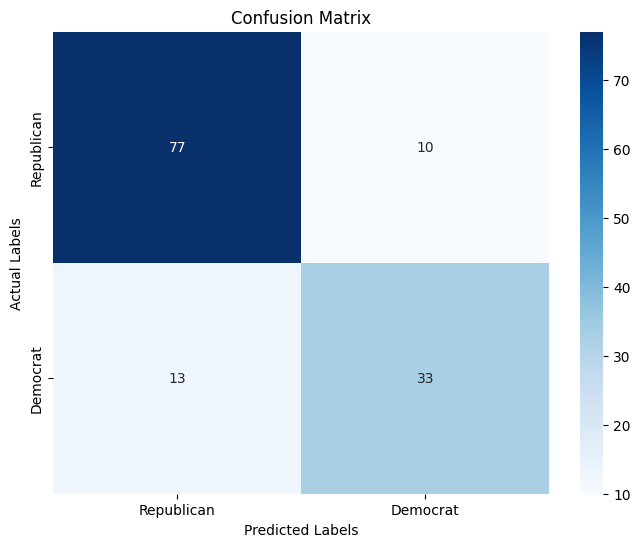

In [51]:
# Show confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Republican', 'Democrat'], yticklabels=['Republican', 'Democrat'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [52]:
# Generate output dataframe
X_df = pd.DataFrame(X, columns=features_to_normalize)
results_df = pd.DataFrame({
    'County': df_merged['county_name'].iloc[X_df.index],  # County names from the merged dataframe
    'Actual_Net_Votes': y,
    'Predicted_Net_Votes': predicted_net_votes,
    'Predicted_Labels': predicted_labels,
    'Actual_Labels': actual_labels
})

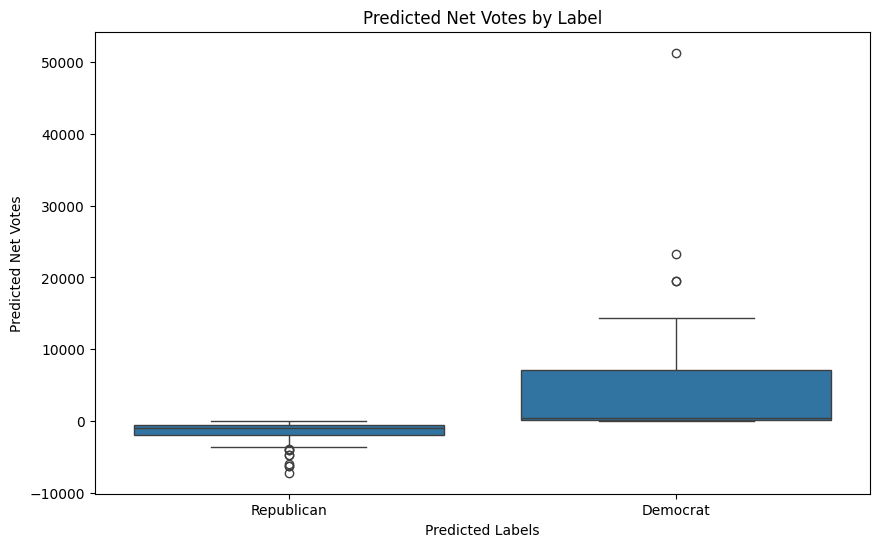

In [53]:
# Group by predicted labels
results_df['Predicted_Labels'] = results_df['Predicted_Labels'].map({0: 'Republican', 1: 'Democrat'})

# Visualize predicted net votes by label
plt.figure(figsize=(10, 6))
sns.boxplot(x='Predicted_Labels', y='Predicted_Net_Votes', data=results_df)
plt.xlabel('Predicted Labels')
plt.ylabel('Predicted Net Votes')
plt.title('Predicted Net Votes by Label')
plt.show()

In [34]:
!pip3 install mapclassify

In [54]:
# Generate chloropleth maps
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load shapefile containing Virginia county boundaries
shapefile_path = "VirginiaCounty_ClippedToShoreline.shx"
vdf = pd.read_csv('./project_voting/data/voting_VA.csv') # Load historical voting data
cdf = pd.read_csv('./project_voting/data/county_adjacencies.csv') # Load county adjacency data and population data
gdf = gpd.read_file(shapefile_path)

gdf_columns = gdf.columns.tolist()
print(gdf_columns)

gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
df = gdf.merge(cdf,left_on='FIPS_left',right_on='FIPS')
df.head(10)

['STCOFIPS', 'GNIS', 'NAME', 'NAMELSAD', 'GSOURCE', 'LADOPT', 'LASTUPDATE', 'JURISTYPE', 'AREASQMI', 'Shape_Leng', 'Shape_Area', 'geometry']


,STCOFIPS,GNIS,NAME,NAMELSAD,GSOURCE,LADOPT,LASTUPDATE,JURISTYPE,AREASQMI,Shape_Leng,...,N3,N4,N5,N6,N7,N8,N9,N10,N11,N12
0,51001,1480091,Accomack,Accomack County,T,N,2014-08-20,CO,1195.366291,4.949957e+06,...,Middlesex,Mathews,Northampton,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51003,1675170,Albemarle,Albemarle County,L,Y,2021-03-29,CO,725.634334,2.310198e+05,...,Augusta,Rockingham,Greene,Orange,Louisa,Fluvanna,Buckingham,Nelson,NaN,NaN
2,51005,1492459,Alleghany,Alleghany County,V,N,2014-09-15,CO,449.544769,2.062654e+05,...,Botetourt,CovingtonCity,Rockbridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51007,1497770,Amelia,Amelia County,T,Y,2021-03-29,CO,360.945234,1.776617e+05,...,Powhatan,Chesterfield,Dinwiddie,Nottoway,NaN,NaN,NaN,NaN,NaN,NaN
4,51009,1480095,Amherst,Amherst County,V,N,2020-09-11,CO,478.766949,1.876610e+05,...,Appomattox,Campbell,Bedford,LynchburgCity,NaN,NaN,NaN,NaN,NaN,NaN
5,51011,1497238,Appomattox,Appomattox County,T,N,2020-09-11,CO,335.405489,1.362133e+05,...,Nelson,Buckingham,PrinceEdward,Charlotte,NaN,NaN,NaN,NaN,NaN,NaN
6,51013,1480097,Arlington,Arlington County,L,Y,2014-12-01,CO,26.064444,4.501493e+04,...,AlexandriaCity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,51015,1480098,Augusta,Augusta County,V,N,2014-08-01,CO,970.288077,3.069250e+05,...,Albemarle,Nelson,Rockbridge,Bath,StauntonCity,WaynesboroCity,NaN,NaN,NaN,NaN
8,51017,1673638,Bath,Bath County,L,Y,2014-08-01,CO,534.379403,1.806447e+05,...,Augusta,Rockbridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,51019,1674818,Bedford,Bedford County,L,Y,2021-09-23,CO,776.090456,2.691647e+05,...,Rockbridge,Amherst,LynchburgCity,Campbell,Pittsylvania,Franklin,BedfordCity,NaN,NaN,NaN


In [55]:
results_df.head(10)

,County,Actual_Net_Votes,Predicted_Net_Votes,Predicted_Labels,Actual_Labels
0,ACCOMACK,-531,-1901.5,Republican,0
1,ALBEMARLE,7221,442.0,Democrat,1
2,ALEXANDRIA CITY,17232,9051.0,Democrat,1
3,ALLEGHANY,-1206,-781.5,Republican,0
4,AMELIA,-993,-930.0,Republican,0
5,AMHERST,-1790,-1682.0,Republican,0
6,APPOMATTOX,-1428,-912.0,Republican,0
7,ARLINGTON,27675,14272.5,Democrat,1
8,AUGUSTA,-6625,-6263.5,Republican,0
9,BATH,-396,-136.0,Republican,0


In [56]:
# Join results dataframe and merged df from shapefile together
df['NAME'] = df['NAME'].str.upper()
joined_df = df.merge(results_df, left_on='NAME', right_on='County')
joined_df.drop(columns=['County_y'])
joined_df.head(10)

,STCOFIPS,GNIS,NAME,NAMELSAD,GSOURCE,LADOPT,LASTUPDATE,JURISTYPE,AREASQMI,Shape_Leng,...,N8,N9,N10,N11,N12,County_y,Actual_Net_Votes,Predicted_Net_Votes,Predicted_Labels,Actual_Labels
0,51001,1480091,ACCOMACK,Accomack County,T,N,2014-08-20,CO,1195.366291,4.949957e+06,...,NaN,NaN,NaN,NaN,NaN,ACCOMACK,-531,-1901.5,Republican,0
1,51003,1675170,ALBEMARLE,Albemarle County,L,Y,2021-03-29,CO,725.634334,2.310198e+05,...,Fluvanna,Buckingham,Nelson,NaN,NaN,ALBEMARLE,7221,442.0,Democrat,1
2,51005,1492459,ALLEGHANY,Alleghany County,V,N,2014-09-15,CO,449.544769,2.062654e+05,...,NaN,NaN,NaN,NaN,NaN,ALLEGHANY,-1206,-781.5,Republican,0
3,51007,1497770,AMELIA,Amelia County,T,Y,2021-03-29,CO,360.945234,1.776617e+05,...,NaN,NaN,NaN,NaN,NaN,AMELIA,-993,-930.0,Republican,0
4,51009,1480095,AMHERST,Amherst County,V,N,2020-09-11,CO,478.766949,1.876610e+05,...,NaN,NaN,NaN,NaN,NaN,AMHERST,-1790,-1682.0,Republican,0
5,51011,1497238,APPOMATTOX,Appomattox County,T,N,2020-09-11,CO,335.405489,1.362133e+05,...,NaN,NaN,NaN,NaN,NaN,APPOMATTOX,-1428,-912.0,Republican,0
6,51013,1480097,ARLINGTON,Arlington County,L,Y,2014-12-01,CO,26.064444,4.501493e+04,...,NaN,NaN,NaN,NaN,NaN,ARLINGTON,27675,14272.5,Democrat,1
7,51015,1480098,AUGUSTA,Augusta County,V,N,2014-08-01,CO,970.288077,3.069250e+05,...,WaynesboroCity,NaN,NaN,NaN,NaN,AUGUSTA,-6625,-6263.5,Republican,0
8,51017,1673638,BATH,Bath County,L,Y,2014-08-01,CO,534.379403,1.806447e+05,...,NaN,NaN,NaN,NaN,NaN,BATH,-396,-136.0,Republican,0
9,51019,1674818,BEDFORD,Bedford County,L,Y,2021-09-23,CO,776.090456,2.691647e+05,...,Franklin,BedfordCity,NaN,NaN,NaN,BEDFORD,-7808,-7216.5,Republican,0


<Axes: >

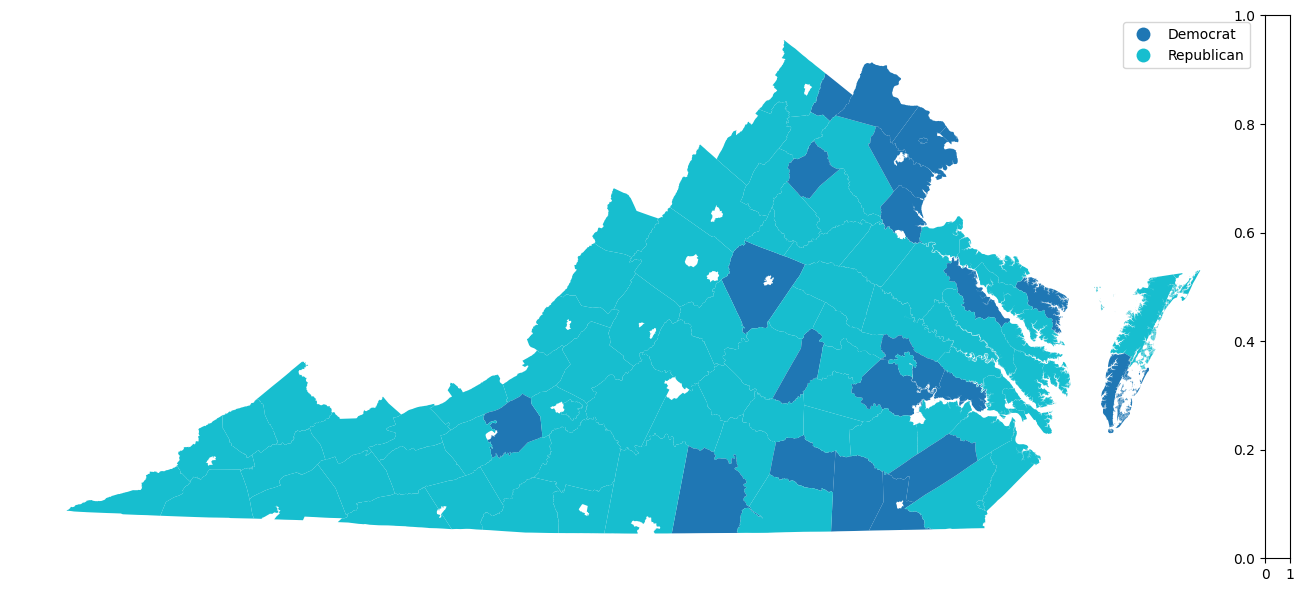

In [57]:
# Generate chloropleth map displaying counties that voted for democrat vs republican
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
joined_df.plot(ax=ax,column='Predicted_Labels',legend=True,cax=cax)

<Axes: >

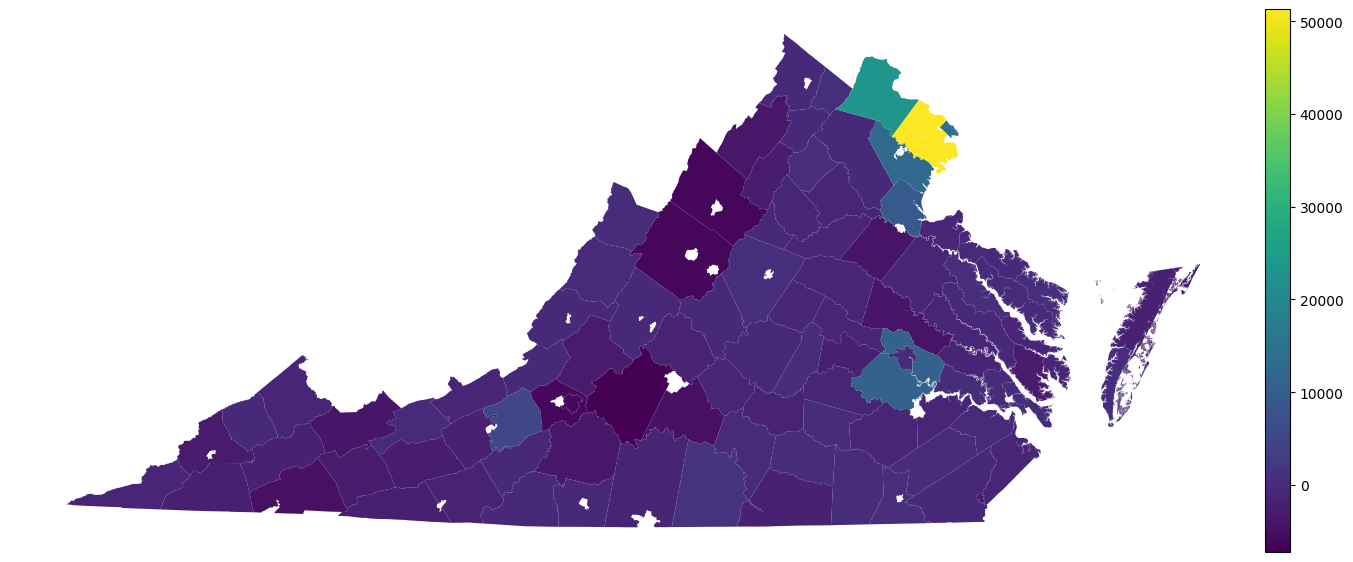

In [58]:
# Generated chloropleth map based on predicted net votes among counties
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
joined_df.plot(ax=ax,column='Predicted_Net_Votes',legend=True,cax=cax)